
[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


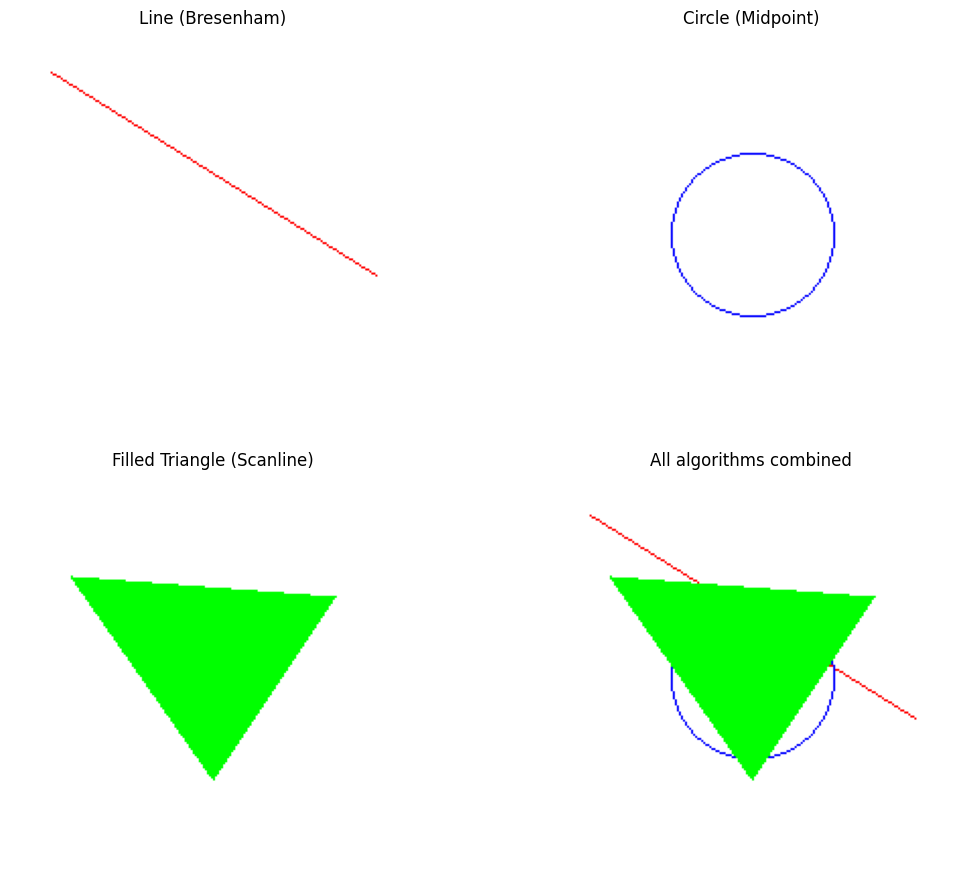

In [3]:
%pip install Pillow matplotlib
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import math

# Set up drawing environment
width, height = 200, 200

def bresenham(x0, y0, x1, y1, pixels):
    """Draws a line between (x0, y0) and (x1, y1) using Bresenham's algorithm."""
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy
    x, y = x0, y0

    while True:
        # Draw pixel if within bounds
        if 0 <= x < width and 0 <= y < height:
            pixels[x, y] = (255, 0, 0) # Red

        if x == x1 and y == y1:
            break

        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x += sx
        if e2 < dx:
            err += dx
            y += sy

def midpoint_circle(x0, y0, radius, pixels):
    """Draws a circle centered at (x0, y0) with given radius using midpoint algorithm."""
    x = radius
    y = 0
    p = 1 - radius # Initial decision parameter

    # Draw first set of points (8-way symmetry)
    plot_circle_points(x0, y0, x, y, pixels)

    while x >= y:
        y += 1
        if p <= 0:
            p = p + 2*y + 1
        else:
            x -= 1
            p = p + 2*y - 2*x + 1

        # Draw points in all octants if x >= y
        if x < y:
            break
        plot_circle_points(x0, y0, x, y, pixels)

def plot_circle_points(xc, yc, x, y, pixels):
    """Draws the 8 symmetric points of the circle."""
    points = [
        (xc + x, yc + y), (xc - x, yc + y), (xc + x, yc - y), (xc - x, yc - y),
        (xc + y, yc + x), (xc - y, yc + x), (xc + y, yc - x), (xc - y, yc - x)
    ]
    for px, py in points:
        if 0 <= px < width and 0 <= py < height:
            pixels[px, py] = (0, 0, 255) # Blue

def fill_triangle(p1, p2, p3, pixels):
    """Fills a triangle defined by p1, p2, p3 using scanline rasterization."""
    # Sort points by Y coordinate
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    # Helper function to interpolate X along an edge for a given Y
    def interpolate_x(y_start, y_end, x_start, x_end, y_current):
        if y_end == y_start:
            return x_start # Avoid division by zero if line is horizontal
        # Linear interpolation
        return int(x_start + (x_end - x_start) * (y_current - y_start) / (y_end - y_start))

    # Fill bottom half of triangle (if it exists)
    for y in range(y1, y2 + 1):
        # Interpolate x on edges p1-p3 and p1-p2
        x_a = interpolate_x(y1, y3, x1, x3, y)
        x_b = interpolate_x(y1, y2, x1, x2, y)
        # Ensure correct order for drawing loop
        x_start, x_end = min(x_a, x_b), max(x_a, x_b)
        # Draw horizontal line (scanline)
        for x in range(x_start, x_end + 1):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0) # Green

    # Fill top half of triangle (if it exists)
    for y in range(y2 + 1, y3 + 1):
        # Interpolate x on edges p1-p3 and p2-p3
        x_a = interpolate_x(y1, y3, x1, x3, y)
        x_b = interpolate_x(y2, y3, x2, x3, y)
        # Ensure correct order
        x_start, x_end = min(x_a, x_b), max(x_a, x_b)
        # Draw horizontal line (scanline)
        for x in range(x_start, x_end + 1):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0) # Green

# Create separate images for each algorithm
image_line = Image.new('RGB', (width, height), 'white')
pixels_line = image_line.load()
bresenham(20, 20, 180, 120, pixels_line)

image_circle = Image.new('RGB', (width, height), 'white')
pixels_circle = image_circle.load()
midpoint_circle(100, 100, 40, pixels_circle)

image_triangle = Image.new('RGB', (width, height), 'white')
pixels_triangle = image_triangle.load()
fill_triangle((30, 50), (100, 150), (160, 60), pixels_triangle)

# Create combined image
image_combined = Image.new('RGB', (width, height), 'white')
pixels_combined = image_combined.load()
bresenham(20, 20, 180, 120, pixels_combined)
midpoint_circle(100, 100, 40, pixels_combined)
fill_triangle((30, 50), (100, 150), (160, 60), pixels_combined)

# Display results
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
plt.imshow(image_line)
plt.title("Line (Bresenham)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_circle)
plt.title("Circle (Midpoint)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_triangle)
plt.title("Filled Triangle (Scanline)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_combined)
plt.title("All algorithms combined")
plt.axis('off')

plt.tight_layout()
plt.show()
